### **Context**


Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

### **problem statement**

I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

### **Data Dictionary**

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install warnings
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [3]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### **Observation**

Columns N,P and K have integer as their data type.

Columns temperature,humidity,ph and rainfall have float as their data type.

label has object as it data type.

In [5]:
#Descriptive Statistics for the dataframe,df
Statistics = df.describe()
Statistics

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### **Observation**



Each column has 2200 columns which indicates consistency in the count that suggests they are no missing values which implies data completeness and integrity.

Column 1,3 and 7 have a high standard deviation which indicates high variability.

Column 7 has the highest range(Max value - Min Value) which indicates the presence of outliers and a wide distribution of data points.

Column 6 has the least mean,standard deviation and range which indicates it might represent a less variable metric or feature.

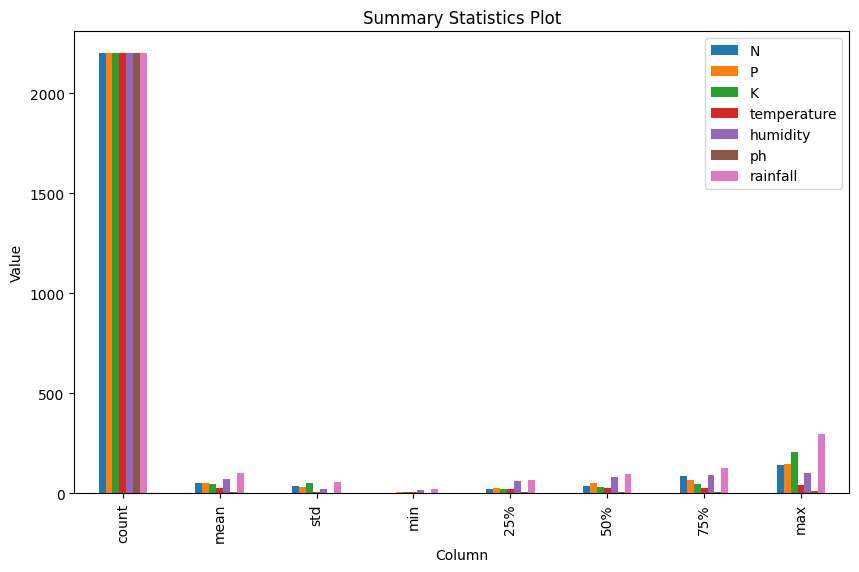

In [6]:
#summary stats plot for this data description
summary_stats = df.describe()
summary_stats.plot(kind = 'bar',figsize = (10,6))
plt.title('Summary Statistics Plot')
plt.xlabel('Column')
plt.ylabel('Value')
plt.show()

### **Data Preparation and Exploration**

Data Cleaning

In [7]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
#checking for and handling outliers
# List of numeric columns (excluding 'label')
numeric_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Calculate quantiles and IQR for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers in numeric columns
df_no_outliers = df.copy()  # Create a copy of original dataframe
for col in numeric_columns:
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound[col]) & (df_no_outliers[col] <= upper_bound[col])]

# Check shape after removing outliers
print("Shape after removing outliers:", df_no_outliers.shape)


Shape after removing outliers: (1768, 8)


In [10]:
#drop outliers
# Drop outliers based on IQR
df_no_outliers = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Reset index if needed
df_no_outliers.reset_index(drop=True, inplace=True)

# Display the DataFrame without outliers
df_no_outliers


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
2,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
3,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
4,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
1763,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
1764,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
1765,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
1766,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [11]:
#check if there are still outliers
outliers = (df_no_outliers[numeric_columns] < lower_bound) | (df_no_outliers[numeric_columns] > upper_bound)
outliers_count = outliers.sum()
print(outliers_count)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
dtype: int64


In [12]:
df_no_outliers = df

<Axes: >

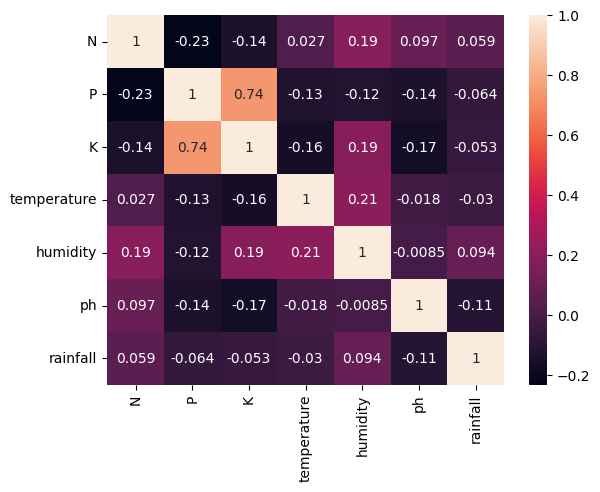

In [13]:
#create a heatmap
numeric_df = df_no_outliers.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(),annot=True)

In [14]:
df['label'].value_counts().to_frame('crops and their count')

,crops and their count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


### **Data Preprocessing**

In [15]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder()
scaler = StandardScaler()

#define numericand categorical columns
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

#transform the data
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, categorical_columns),
        ('num', num_transformer, numeric_columns)
    ])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['label'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))])

In [16]:
#build a pipeline for avoiding data data leakage
from sklearn.pipeline import Pipeline
Pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])
Pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['label'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'))]))])

In [17]:
#split the data
y = df['label']
X = df.drop('label',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


### **Build a Model**

Building a model that will help to recommend the most suitable crops to grow in a particular farm based on various parameters

In [18]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))


accuracy score: 0.9454545454545454
confusion matrix [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  2  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 22  1  0  

In [19]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))



accuracy score: 0.9886363636363636
confusion matrix [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  

In [20]:
#Knearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))

accuracy score: 0.9704545454545455
confusion matrix [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  

In [21]:
#SVM(Support Vector Machines)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svm = SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print("accuracy score:",accuracy_score(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))
print("classification report",classification_report(y_test,y_pred))

accuracy score: 0.9613636363636363
confusion matrix [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0 21  0  0  

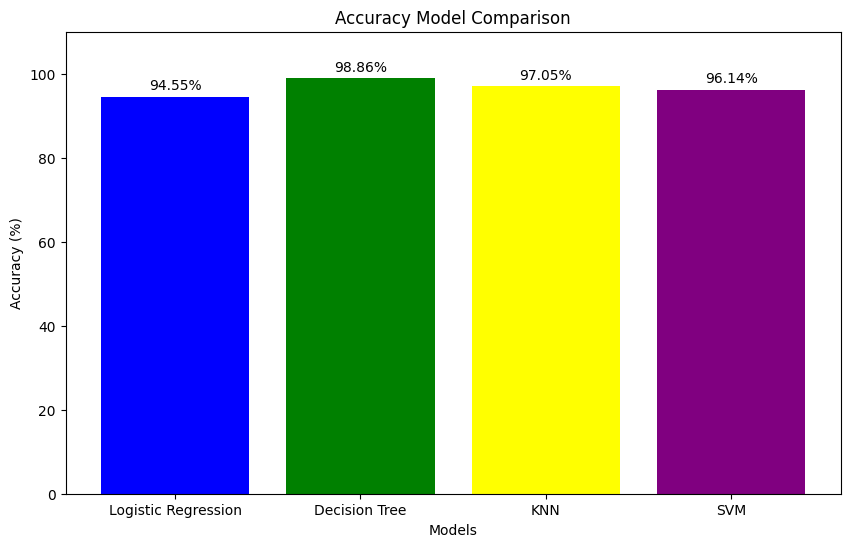

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
models = [lr, dtc, knn, svm]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in models]
accuracies_percent = [accuracy * 100 for accuracy in accuracies]

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(model_names, accuracies_percent, color=['blue', 'green', 'yellow', 'purple'])

# Adding text annotations
for bar, accuracy in zip(bars, accuracies_percent):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{accuracy:.2f}%', ha='center', va='bottom')

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Model Comparison')
plt.ylim(0, 110)
plt.show()


### **Making the prediction**

In [23]:
pred = dtc.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
print(pred)

['coffee']


In [24]:
pred = knn.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
print(pred)

['coffee']


### **Recommendation**

Based on these parameters,Coffee is the recommendable crop to grow in a particular farm.